In [26]:
medicare_payment_model_saved = "medicare_payment_model.pkl"

In [27]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [28]:
df_merge = pd.read_pickle(medicare_payment_model_saved)
df_merge.head()

,NPI,LINE_SRVC_CNT,CURRENT_RATE,PROPOSED_RATE,PRIMARYCARE_GCODE,PRIMARYCARE_GCODE_PLUS5,PRIMARYCARE_GCODE_PLUS8,PRIMARYCARE_GCODE_PLUS10,PROLONGED_VISIT_GCODE,SPECIALTY_GCODE,...,DIFFERENCE_WITH_GCODE_PER_BENE,PROPOSED_RATE_WITH_GCODE_PER_BENE,DIFFERENCE_WITH_GCODE_PLUS5_PER_BENE,DIFFERENCE_WITH_GCODE_PLUS8_PER_BENE,DIFFERENCE_WITH_GCODE_PLUS10_PER_BENE,DOLLARS_SAVED,DIFFERENCE_WITH_GCODE_PLUS_SAVED,DIFFERENCE_WITH_GCODE_PLUS_PROLONGED,PROPOSED_RATE_FULL,BENEFICIARY_AVERAGE_RISK_SCORE_BINNED
0,1003000423,43.0,3758.0,2719.0,0.0,0.0,0.0,0.0,0.0,243.0,...,-12.670732,33.158537,-12.670732,-12.670732,-12.670732,0.00,-1039.00,-1039.0,2962.00,low
1,1003000480,94.0,7403.0,10086.0,0.0,0.0,0.0,0.0,515.9,0.0,...,23.743363,89.256637,23.743363,23.743363,23.743363,0.00,2683.00,3198.9,10601.90,low
2,1003000522,1034.0,98646.0,94005.0,5090.0,10180.0,13234.0,15270.0,770.5,0.0,...,1.076739,237.637890,13.282974,20.606715,25.489209,2432.88,2881.88,1219.5,102298.38,low
3,1003000530,759.0,80252.0,70587.0,3795.0,7590.0,9867.0,11385.0,1809.0,0.0,...,-17.574850,222.700599,-6.212575,0.604790,5.149701,0.00,-5870.00,-4061.0,76191.00,low
4,1003000902,684.0,56788.0,60972.0,3255.0,6510.0,8463.0,9765.0,0.0,0.0,...,28.833333,248.941860,41.449612,49.019380,54.065891,1661.60,9100.60,7439.0,65888.60,low


In [29]:
df_merge['DIFFERENCE_FULL'] = df_merge['PROPOSED_RATE_FULL'] - df_merge['CURRENT_RATE']

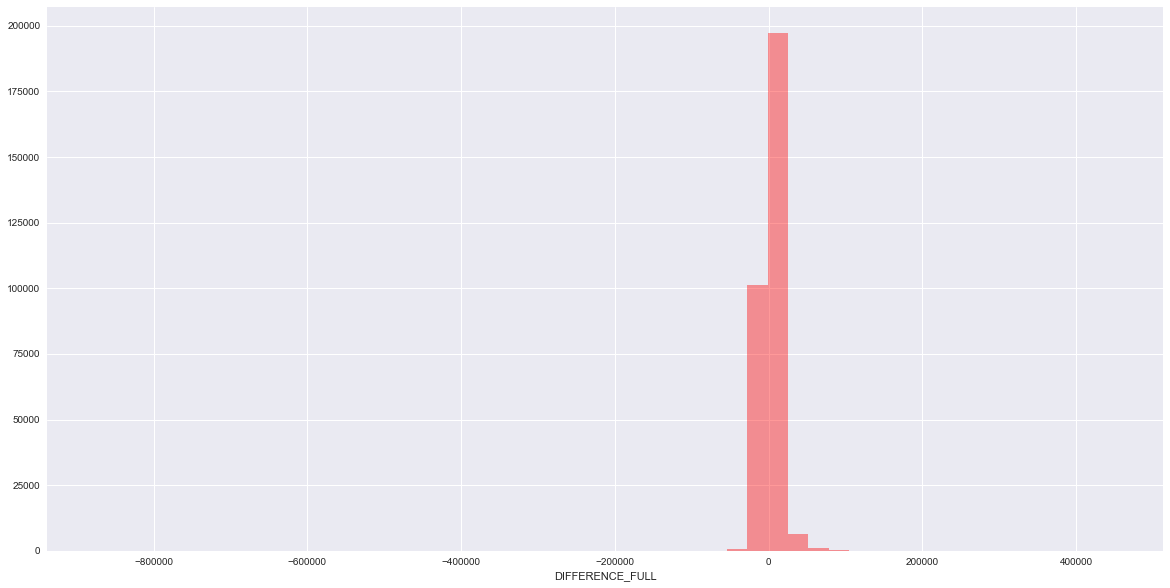

In [40]:
fig, ax = plt.subplots(figsize=(20,10))
#plt.xlim(-20000, 40000)
sns.distplot(df_merge['DIFFERENCE_FULL'], color = 'r', hist=True,kde=False, label='Full Difference');

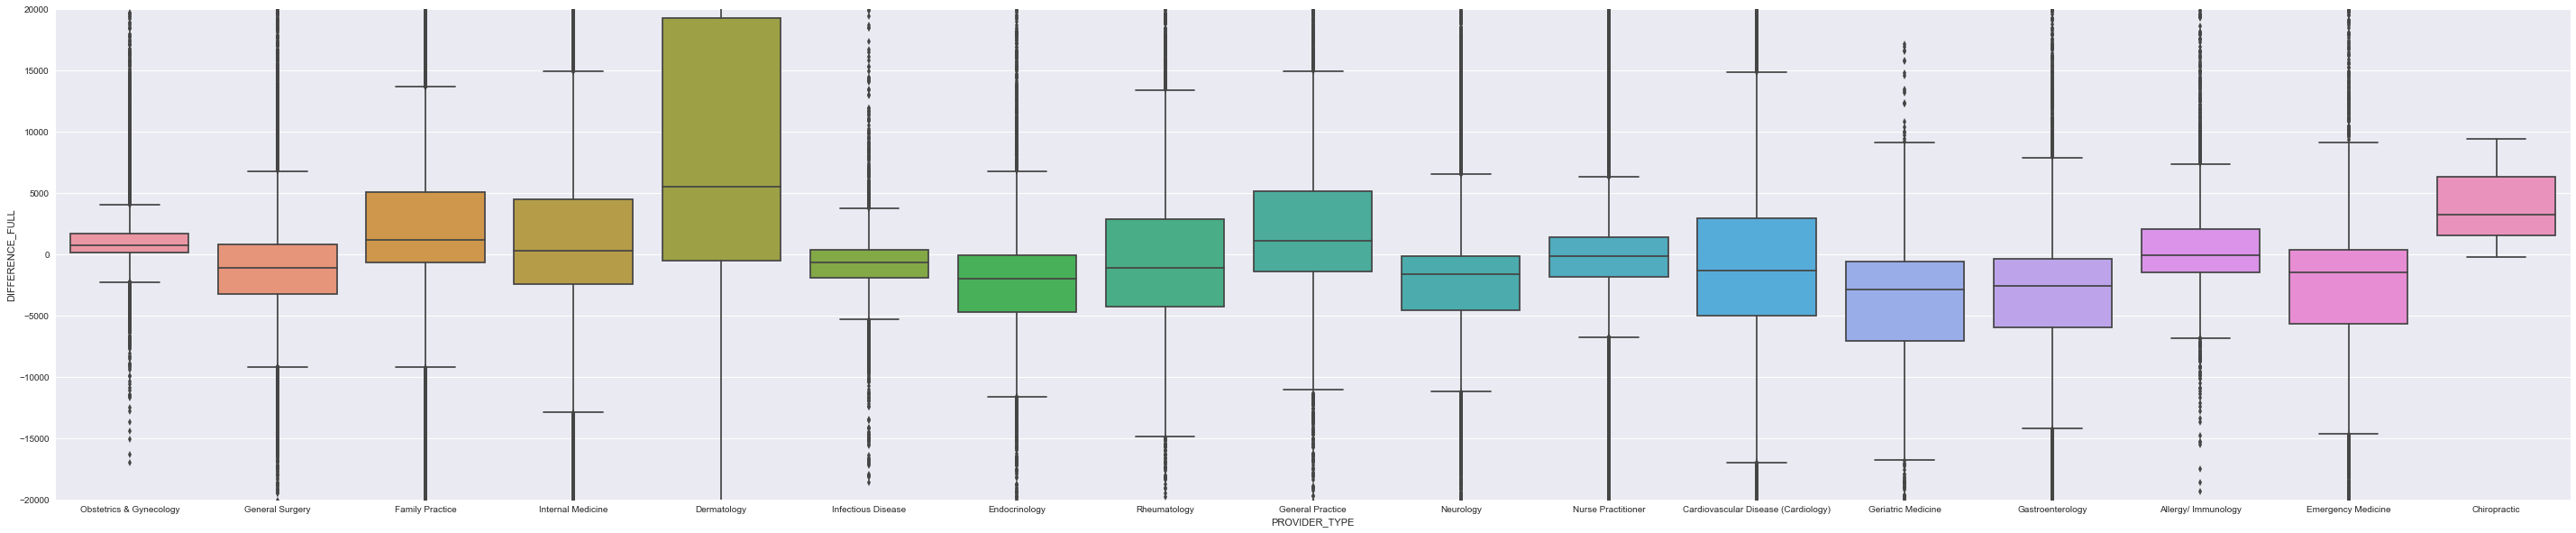

In [41]:
plt.subplots(figsize=(50,10))
plt.ylim(-20000, 20000)
sns_boxplt = sns.boxplot(y="DIFFERENCE_FULL", x="PROVIDER_TYPE", data=df_merge)
sns_boxplt.get_figure().savefig("boxplt_diff_by_providerType.png")

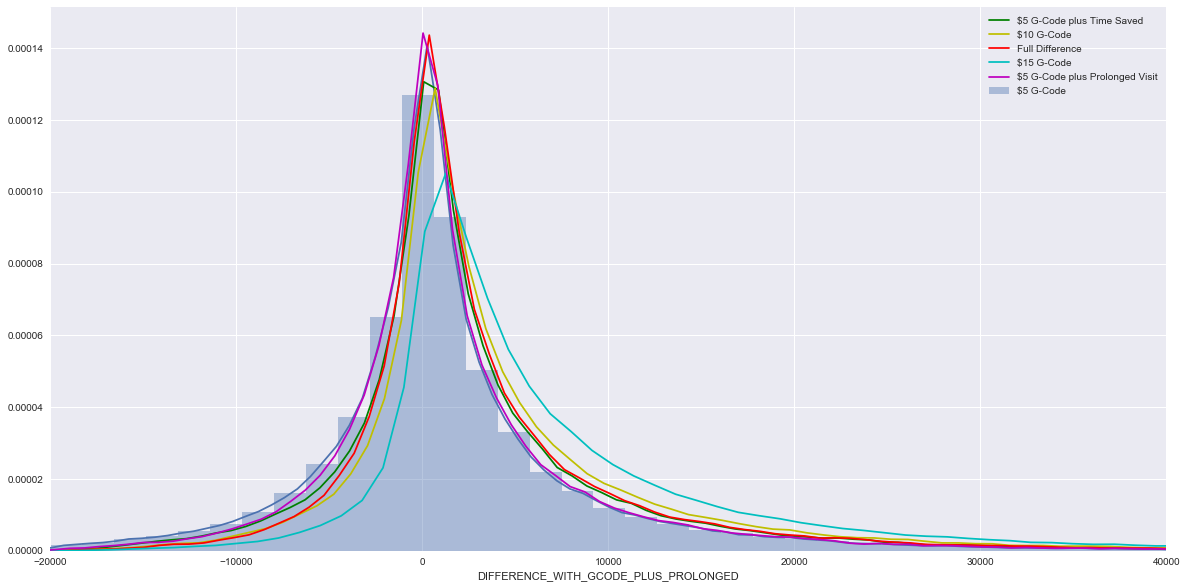

In [30]:
fig, ax = plt.subplots(figsize=(20,10))
plt.xlim(-20000, 40000)
df_filterdDiff = df_merge.query('DIFFERENCE_WITH_GCODE > -20000 & DIFFERENCE < 40000 & PROVIDER_TYPE == "Family Practice"')
sns.distplot(df_filterdDiff['DIFFERENCE_WITH_GCODE'], hist=True, label='$5 G-Code');
sns.distplot(df_filterdDiff['DIFFERENCE_WITH_GCODE_PLUS_SAVED'], color = 'g', hist=False, label='$5 G-Code plus Time Saved');
sns.distplot(df_filterdDiff['DIFFERENCE_WITH_GCODE_PLUS5'], color = 'y', hist=False,kde=True, label='$10 G-Code');
sns.distplot(df_filterdDiff['DIFFERENCE_FULL'], color = 'r', hist=False,kde=True, label='Full Difference');
sns.distplot(df_filterdDiff['DIFFERENCE_WITH_GCODE_PLUS10'], color = 'c', hist=False,kde=True, label='$15 G-Code');
sns.distplot(df_filterdDiff['DIFFERENCE_WITH_GCODE_PLUS_PROLONGED'], color = 'm', hist=False,kde=True, label='$5 G-Code plus Prolonged Visit');

In [14]:
df_fp = df_merge.query('PROVIDER_TYPE == "Family Practice"')
print("Given Proposed Rate + $5 Primary Care Gcode + Prolonged Visit Gcode (75% of Level 5 New and 50% of Level 5 Est.) + Dollars Saved")
print(df_fp.query('DIFFERENCE_FULL < 0').NPI.nunique(),"\t- Are payment adj negative")
print(df_fp.query('DIFFERENCE_FULL == 0').NPI.nunique(),"\t- Are payment adj neutral")
print(df_fp.query('DIFFERENCE_FULL > 0').NPI.nunique(),"\t- Are payment adj positive")

Given Proposed Rate + $5 Primary Care Gcode + Prolonged Visit Gcode (75% of Level 5 New and 50% of Level 5 Est.) + Dollars Saved
22640 	- Are payment adj negative
0 	- Are payment adj neutral
45875 	- Are payment adj positive


In [16]:
print(df_fp.query('DIFFERENCE_WITH_GCODE < 0').NPI.nunique()," - Are payment adj negative with $5 Gcode")
print(df_fp.query('DIFFERENCE_WITH_GCODE > 0').NPI.nunique()," - Are payment adj positive with $5 Gcode")
print(df_fp.query('DIFFERENCE_WITH_GCODE < 0 & DIFFERENCE_WITH_GCODE_PLUS_SAVED > 0').NPI.nunique()," - Become payment adj positive with time saved")
print(df_fp.query('DIFFERENCE_WITH_GCODE < 0 & DIFFERENCE_WITH_GCODE_PLUS5 > 0').NPI.nunique()," - Become payment adj positive with $10 Gcode")
print(df_fp.query('DIFFERENCE_WITH_GCODE < 0 & DIFFERENCE_WITH_GCODE_PLUS8 > 0').NPI.nunique()," - Become payment adj positive with $13 Gcode")
print(df_fp.query('DIFFERENCE_WITH_GCODE < 0 & DIFFERENCE_WITH_GCODE_PLUS10 > 0').NPI.nunique()," - Become payment adj positive with $15 Gcode")
print(df_fp.query('DIFFERENCE_WITH_GCODE_PLUS10 < 0').NPI.nunique()," - Remain payment adj negative with $15 Gcode")


29712  - Are payment adj negative with $5 Gcode
38794  - Are payment adj positive with $5 Gcode
5369  - Become payment adj positive with time saved
10633  - Become payment adj positive with $10 Gcode
15755  - Become payment adj positive with $13 Gcode
18365  - Become payment adj positive with $15 Gcode
11345  - Remain payment adj negative with $15 Gcode


In [17]:
g10 = df_merge.PRIMARYCARE_GCODE_PLUS10.sum() 
g8 = df_merge.PRIMARYCARE_GCODE_PLUS8.sum() 
g5 = df_merge.PRIMARYCARE_GCODE_PLUS5.sum() 
g = df_merge.PRIMARYCARE_GCODE.sum()
print(g5-g, " - Gcode $10 Additional payment")
print(g8-g, " - Gcode $13 Additional payment")
print(g10-g, " - Gcode $15 Additional payment")

195033772.0  - Gcode $10 Additional payment
312054035.1999999  - Gcode $13 Additional payment
390067544.0  - Gcode $15 Additional payment


In [18]:
print(df_merge.query('DIFFERENCE_WITH_GCODE < 0 & DIFFERENCE_WITH_GCODE_PLUS5 > 0').DIFFERENCE_WITH_GCODE_PLUS5.sum()," - Total additional payment with $10 G-code compared to $5")
print(df_merge.query('DIFFERENCE_WITH_GCODE < 0 & DIFFERENCE_WITH_GCODE_PLUS8 > 0').DIFFERENCE_WITH_GCODE_PLUS8.sum()," - Total additional payment with $13 G-code compared to $5")
print(df_merge.query('DIFFERENCE_WITH_GCODE < 0 & DIFFERENCE_WITH_GCODE_PLUS10 > 0').DIFFERENCE_WITH_GCODE_PLUS10.sum()," - Total additional payment with $15 G-code compared to $5")


16864178.599999998  - Total additional payment with $10 G-code compared to $5
41791067.2  - Total additional payment with $13 G-code compared to $5
63298486.2  - Total additional payment with $15 G-code compared to $5


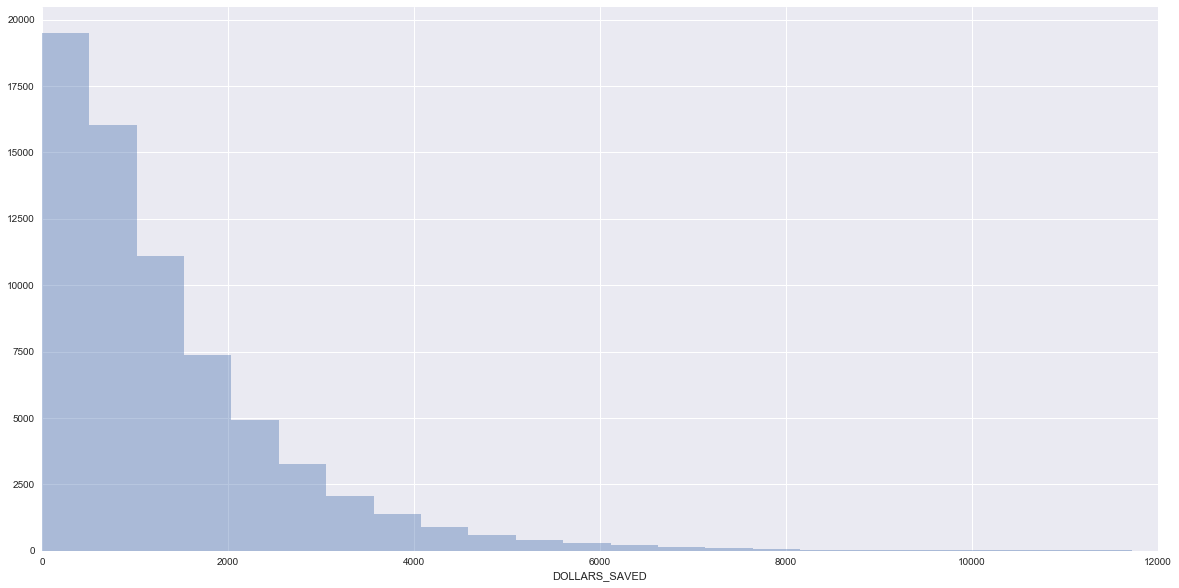

In [19]:
plt.subplots(figsize=(20,10))
plt.xlim(0, 12000)
sns.distplot(df_merge['DOLLARS_SAVED'], kde=False);

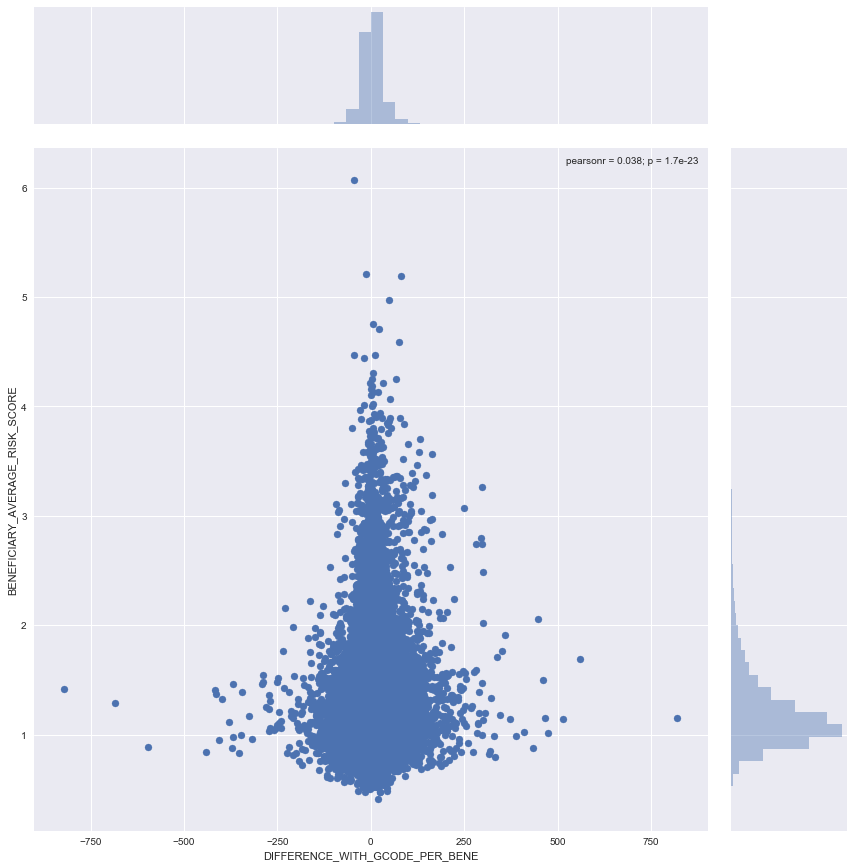

In [20]:
myplt = sns.jointplot(x="DIFFERENCE_WITH_GCODE_PER_BENE", y="BENEFICIARY_AVERAGE_RISK_SCORE", data=df_merge)
myplt.fig.set_figwidth(13)
myplt.fig.set_figheight(13)

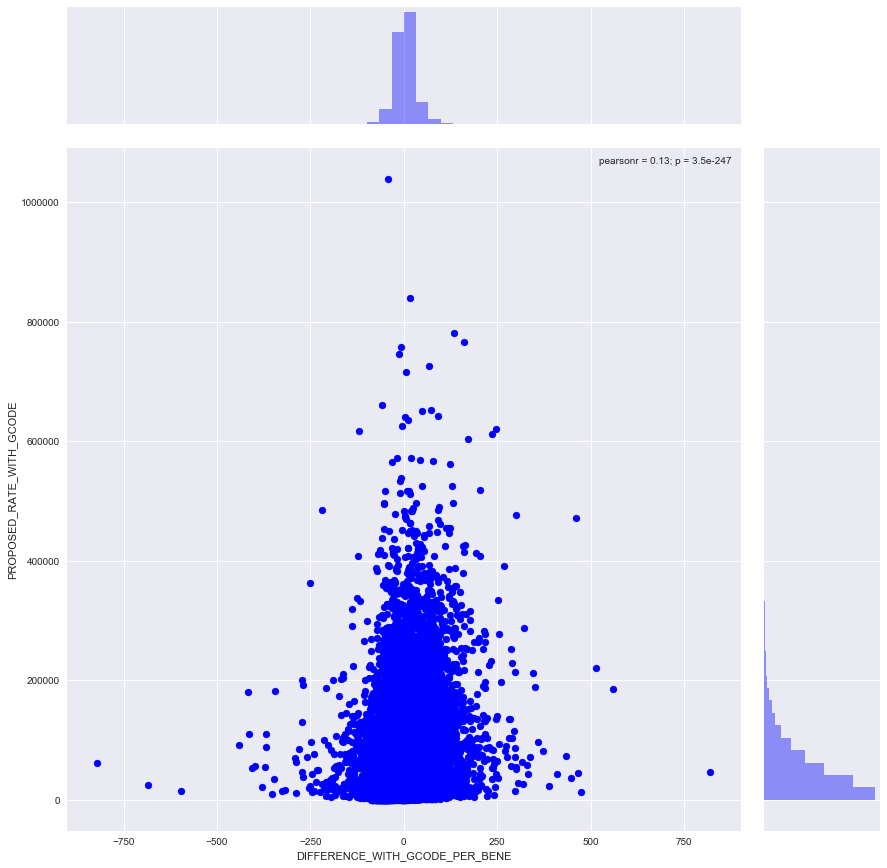

In [21]:
myplt = sns.jointplot(x="DIFFERENCE_WITH_GCODE_PER_BENE", y="PROPOSED_RATE_WITH_GCODE", data=df_merge, color='b', label="Proposed w/$5 Gcode")

myplt.fig.set_figwidth(13)
myplt.fig.set_figheight(13)

In [22]:
bins = [0, 50, 100, 200, 400, 800, 1600, 3200, 6400, 12800]
labels = ["11-50", "50-100", "100-200", "200-400", "400-800", "800-1600", "1600-3200", "3200-6400", "6400-12800"]
df_merge['BENE_BINNED'] = pd.cut(df_merge['TOTAL_UNIQUE_BENES'], bins=bins, labels=labels)

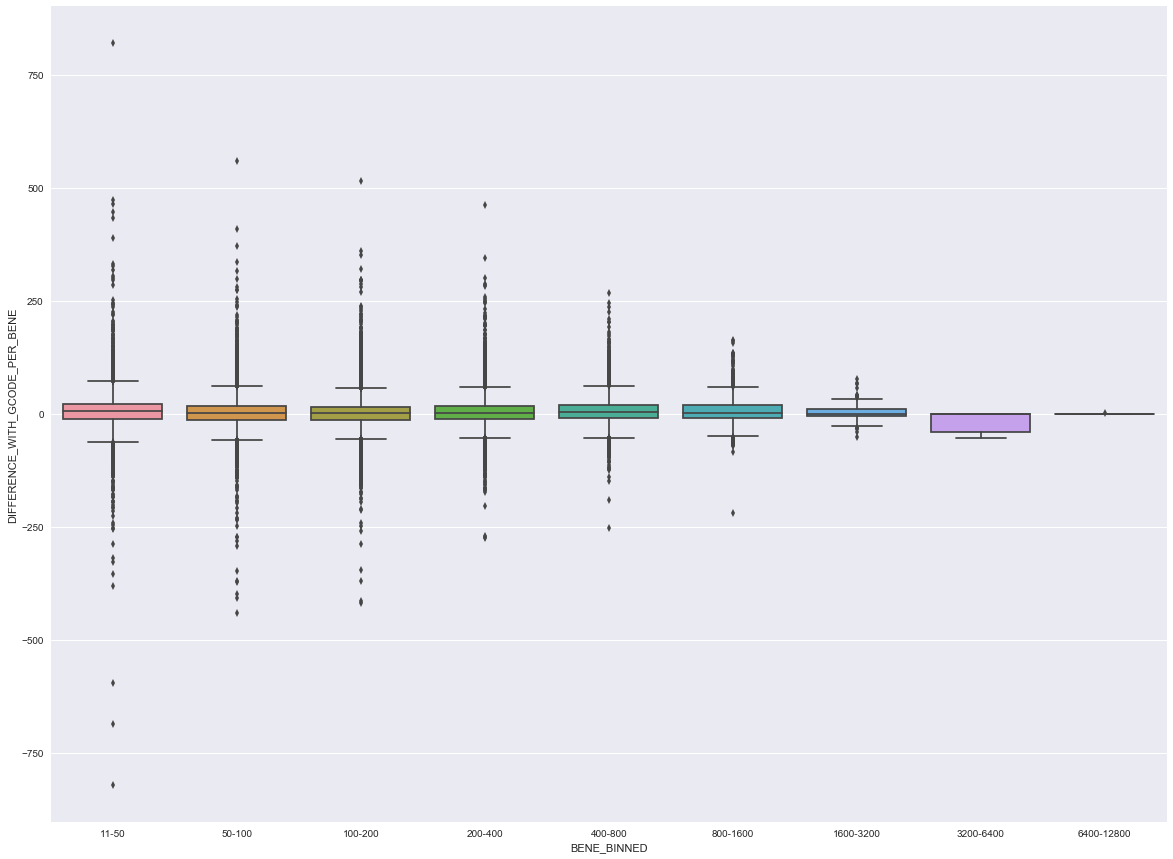

In [23]:
plt.subplots(figsize=(20,15))
sns_boxplt = sns.boxplot(y="DIFFERENCE_WITH_GCODE_PER_BENE", x="BENE_BINNED", data=df_merge)

In [24]:
df_merge.groupby('BENE_BINNED').NPI.nunique()

BENE_BINNED
11-50          5291
50-100         8710
100-200       18084
200-400       23216
400-800       11420
800-1600       1666
1600-3200       111
3200-6400        10
6400-12800        6
Name: NPI, dtype: int64

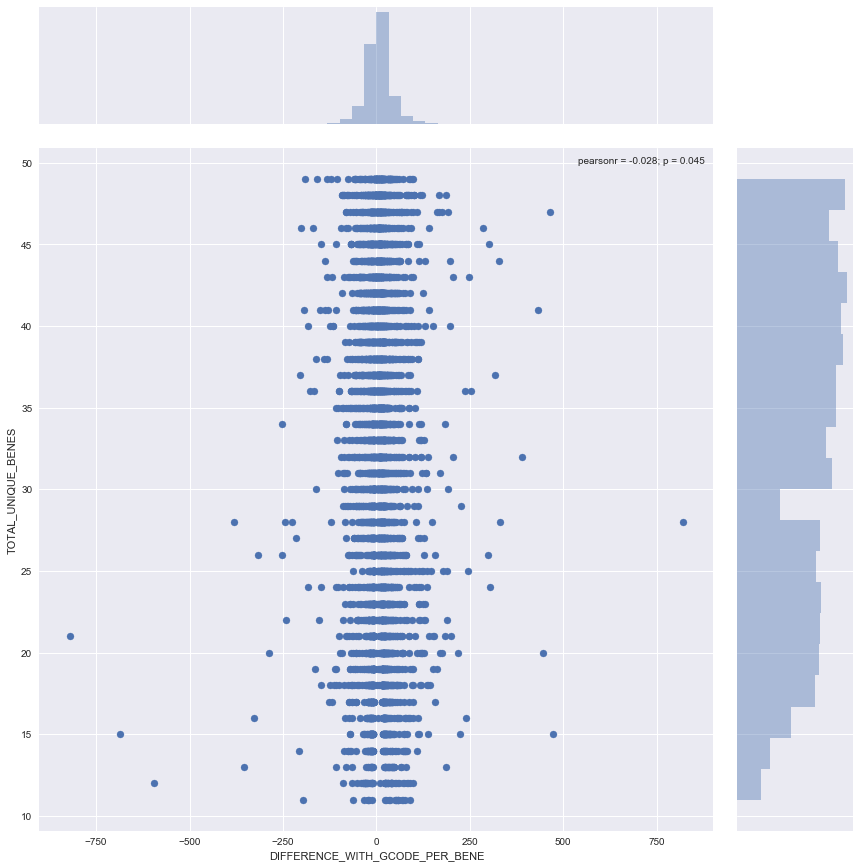

In [25]:
myplt = sns.jointplot(x="DIFFERENCE_WITH_GCODE_PER_BENE", y="TOTAL_UNIQUE_BENES", data=df_merge.query('TOTAL_UNIQUE_BENES < 50'))
myplt.fig.set_figwidth(13)
myplt.fig.set_figheight(13)